<a href="https://colab.research.google.com/github/anshupandey/face_recognition_USTGLOBAL_training/blob/master/face_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import cv2

In [0]:
DNN = "TF"
if DNN == "CAFFE":
    modelFile = "res10_300x300_ssd_iter_140000_fp16.caffemodel"
    configFile = "deploy.prototxt"
    net = cv2.dnn.readNetFromCaffe(configFile, modelFile)
else:
    modelFile = "opencv_face_detector_uint8.pb"
    configFile = "opencv_face_detector.pbtxt"
    net = cv2.dnn.readNetFromTensorflow(modelFile, configFile)

In [0]:
conf_threshold = 0.7

source = 0

def detectFaceOpenCVDnn(net, picture):
    frameOpencvDnn = picture.copy()
    frameHeight = frameOpencvDnn.shape[0]
    frameWidth = frameOpencvDnn.shape[1]
    blob = cv2.dnn.blobFromImage(frameOpencvDnn, 1.0, (300, 300), [104, 117, 123], False, False)
    offset=50
    net.setInput(blob)
    detections = net.forward()
    bboxes = []
    roi =[]
    for i in range(detections.shape[2]):
        confidence = detections[0, 0, i, 2]
        if confidence > conf_threshold:
            x1 = int(detections[0, 0, i, 3] * frameWidth)
            y1 = int(detections[0, 0, i, 4] * frameHeight)
            x2 = int(detections[0, 0, i, 5] * frameWidth)
            y2 = int(detections[0, 0, i, 6] * frameHeight)
            #x, y, w, h=[727, 136, 147, 147]
            x = x1 
            y = y1
            ws = x2 - x1
            hs = y2 - y1
            w=max(ws,hs)
            h=w
            bboxes.append([x1, y1, x2, y2])
           
            roi.append(frameOpencvDnn[y-offset:y+h+offset,x-offset:x+w+offset])
            
    return roi

In [0]:
import time

In [5]:
img = cv2.imread(r"dhoni125.png")
img.shape

(1240, 1450, 3)

In [0]:
import datetime as dt

In [0]:
start = dt.datetime.now()
out = detectFaceOpenCVDnn(net,img)
stop = dt.datetime.now()

In [8]:
stop - start

datetime.timedelta(0, 0, 242572)

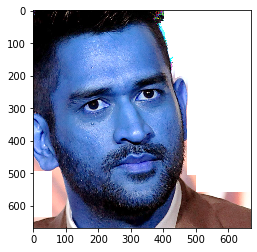

In [9]:
import matplotlib.pyplot as plt
plt.imshow(out[0])
plt.show()

In [0]:
import dlib

In [11]:
!wget http://arunponnusamy.com/files/mmod_human_face_detector.dat

--2020-03-14 16:15:58--  http://arunponnusamy.com/files/mmod_human_face_detector.dat
Resolving arunponnusamy.com (arunponnusamy.com)... 185.199.108.153, 185.199.109.153, 185.199.110.153, ...
Connecting to arunponnusamy.com (arunponnusamy.com)|185.199.108.153|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://www.arunponnusamy.com/files/mmod_human_face_detector.dat [following]
--2020-03-14 16:15:58--  https://www.arunponnusamy.com/files/mmod_human_face_detector.dat
Resolving www.arunponnusamy.com (www.arunponnusamy.com)... 185.199.111.153, 185.199.109.153, 185.199.108.153, ...
Connecting to www.arunponnusamy.com (www.arunponnusamy.com)|185.199.111.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 729940 (713K) [application/octet-stream]
Saving to: ‘mmod_human_face_detector.dat.1’

mmod_human_face_det 100%[===================>] 712.83K  --.-KB/s    in 0.02s   

2020-03-14 16:15:58 (31.1 MB/s) - ‘mmod_human_face_de

In [0]:
dnnFaceDetector = dlib.cnn_face_detection_model_v1("./mmod_human_face_detector.dat")


In [0]:
faceRects = dnnFaceDetector(img, 0)
for faceRect in faceRects:
    x1 = faceRect.rect.left()
    y1 = faceRect.rect.top()
    x2 = faceRect.rect.right()
    y2 = faceRect.rect.bottom()

In [14]:
faceRects

mmod_rectangles[[(422, 293) (829, 700)]]

In [0]:
def detectFaceOpenCVDnn2(dnnFaceDetector, picture):
    frameOpencvDnn = picture.copy()
    faceRects = dnnFaceDetector(frameOpencvDnn, 0)
    offset=50
    roi =[]
    for faceRect in faceRects:
      x1 = faceRect.rect.left()
      y1 = faceRect.rect.top()
      x2 = faceRect.rect.right()
      y2 = faceRect.rect.bottom()
      #x, y, w, h=[727, 136, 147, 147]
      x = x1 
      y = y1
      ws = x2 - x1
      hs = y2 - y1
      w=max(ws,hs)
      h=w
      roi.append(frameOpencvDnn[y-offset:y+h+offset,x-offset:x+w+offset])      
    return roi

In [0]:
start = dt.datetime.now()
out2 = detectFaceOpenCVDnn2(dnnFaceDetector,img)
stop = dt.datetime.now()

In [18]:
stop - start

datetime.timedelta(0, 0, 91555)

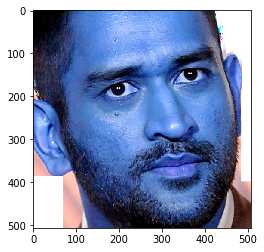

In [19]:
import matplotlib.pyplot as plt
plt.imshow(out2[0])
plt.show()